In [91]:
from sqlalchemy import create_engine, text
import pandas as pd
import datetime
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
 # 1. Create a new dataframe named "movies_df" consisting of only movies.

In [93]:
df = pd.read_csv('disney_plus.csv')

In [94]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88,Documentary,Two Pixar filmmakers strive to bring their uni...,min
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...,min
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,min
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...,Seasons
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...,Season


In [95]:
# column_name = {'type': ['Movie']}

# movie_df = pd.DataFrame(column_name)

In [96]:
# print(movie_df)

In [97]:
column_name = 'type'
desired_value = 'Movie'
movie_df = df[df[column_name] == desired_value]
print (movie_df)

     show_id   type                                     title  \
0         s1  Movie                             A Spark Story   
1         s2  Movie                            Spooky Buddies   
2         s3  Movie                    The Fault in Our Stars   
6         s7  Movie               Confessions of a Shopaholic   
7         s8  Movie                Descendants: Royal Wedding   
...      ...    ...                                       ...   
1359   s1360  Movie  Lady and the Tramp II: Scamp's Adventure   
1361   s1362  Movie                  The Cat from Outer Space   
1362   s1363  Movie                 The Great Mouse Detective   
1363   s1364  Movie                    The Sword in the Stone   
1364   s1365  Movie                           Those Calloways   

                                      director  \
0                   Jason Sterman, Leanne Dare   
1                                 Robert Vince   
2                                   Josh Boone   
6                  

# 2. Create a new dataframe named "movie_ratings" from movies_df that consists of the top 5 ratings by count. This dataframe should consist of only two columns, rating and count.


In [98]:
count_rating = movie_df['rating'].value_counts(ascending = False) 
movie_rating = pd.DataFrame(count_rating)
        
print(movie_rating)
 

          count
rating         
G           235
PG          226
TV-G        224
TV-PG       165
PG-13        60
TV-14        36
TV-Y7        36
TV-Y7-FV      6
TV-Y          2


# 3. Use the movie_ratings dataframe to create a bar chart showing count of the top 5 ratings.

In [99]:
# sample....

# fig, ax = plt.subplots()

# fruits = ['apple', 'blueberry', 'cherry', 'orange']
# counts = [40, 100, 30, 55]
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

# ax.set_ylabel('fruit supply')
# ax.set_title('Fruit supply by kind and color')
# ax.legend(title='Fruit color')

# plt.show()


NameError: name 'rating' is not defined

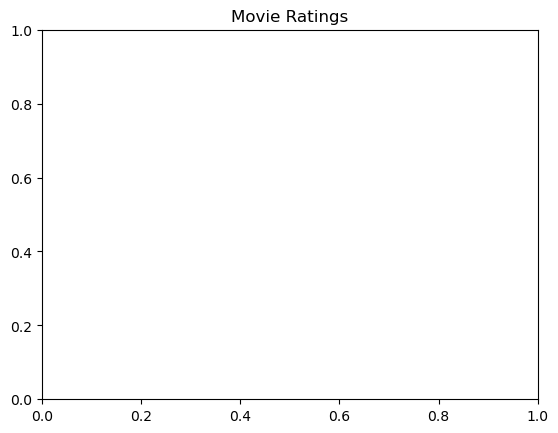

In [36]:
plt.title('Movie Ratings')
x=list(count_rating)
y= rating
bar_labels = ['red', 'blue', '_red', 'orange'] 
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
plt.xlabel(count)
plt.ylabel(rating)
plt.bar(x,y)
plt.show()

# 4. Using the movies_df, subset the data to create a new dataframe named "year_duration" that only consists of 2 columns, release_year and duration.

In [41]:
df['year_duration']= df['release_year'] + df['duration']


# 5. Find min, max, and average duration of movies from the 1975-1984.

In [72]:
movies = df[(df['release_year'] >= 1975) & (df['release_year'] <= 1984)]
min_movies = movies[movies['duration_units'] == "min"]
min_movies = movies['duration'].min()
print(min_movies)

1


In [71]:
#max_moves
movies = df[(df['release_year'] >= 1975) & (df['release_year'] <= 1984)]
max_movies = movies[movies['duration_units'] == "min"]
max_movies = movies['duration'].max()
print(max_movies)

135


In [74]:
#average_movies
movies = df[(df['release_year'] >= 1975) & (df['release_year'] <= 1984)]
avg_movies = movies[movies['duration_units'] == "min"]
avg_movies = movies['duration'].mean()
print(avg_movies)

79.3157894736842


#  6.Create a scatterplot using year_duration that looks at movie durations over the years.  Do you notice any correlation from inspecting the scatterplot?

# 7. Find the actual correlation value, is there any correlation?

# 8. Use movie_df to find which year had the most G-rated releases. Can you do this in a single line of code?

In [101]:
G_rated = df.groupby(["release_year"]), df.groupby(["rating"]).value_counts()
 
G_string

release_year  rating  
1928          TV-Y7       1
1932          TV-Y7       2
              TV-G        1
1933          TV-Y7       2
              TV-G        1
                         ..
2021          TV-Y        5
              G           3
              TV-Y7-FV    3
              TV-Y7       2
              PG-13       1
Name: count, Length: 342, dtype: int64

# 9. Which year had the most movie releases?  What percentage of movies that year had durations over 2 hours?

In [102]:
count_movies = df.groupby('release_year')(['type']).value_counts()

TypeError: 'DataFrameGroupBy' object is not callable

# 10. Create a new column in movies_df that catagorizes each movie as either short, average, or long.  Short movies should be 30 mins or less, long movies should be over 2 hours.

# 11. Make a pie chart of the above movie lengths.

# 12. Which movie had the greatest gap from the year it was released to the year it was added? **Hint:** You might want to convert the date_added column to a datetime format so that you can easily extract the year from it.  What is the average number of years between release to being added?

# 13. How many movies were added during the first year after the pandemic lockdown? (Assume the lockdown began on March 16, 2020)

# 14. How many movies have been added on your birthday?

# 15. How many TV shows or Movies have the word 'dog' in the title regardless if it is capitalized?